<h4 align=center>Dr. Jesús Martí Gavilá. Departamento de Ingeniería Cartográfica, Geodesia y fotogrametría </h4>
<font color="blue" ><h1 align=center>PRÁCTICA 11</h1> <p> <h1 align=center> CURSO BÁSICO PYTHON: GEOTIFF, SHAPE Y PLUGINS FOLIUM</h1></font>

<a href="http://www.upv.es/titulaciones/GTI/indexc.html"><img src = "http://www.upv.es/imagenes/marcaUPVN1.png" width =200 ></a>

<h2 align=center>Grado Tecnologías Interactivas | Tecnologías de la Información Geográfica</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>FOLIUM</b> es una biblioteca de visualización de Python que se desarrolló con el único fin de visualizar datos geoespaciales. Es una biblioteca completamente gratuita. <p>  
<h2>Tabla de Contenido</h2>   
    <ul>
        <li>
            Datos Raster
        </li>
        <li>
            Datos Vectoriales
        </li>
        <li>
            Plugins
        </li>
    </ul>
<p>
<b> Documentación: </b> <a href="https://python-visualization.github.io/folium/"> https://python-visualization.github.io/folium/</a><p>    
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
<b>RECOMENDACIONES</b><p><li>Comprobar la versión de python del pluging para el que está creado. </li><p><li> Utilizar  (pip install -U "LIBRERIA") para que instale la última versión adecuada a vuestro enviroment.</li><p>
    <li>Si no funciona PIP, utilizar la otra ópcion: (conda install c conda-forge "LIBRERIA")</li>
    </ul>
   
   
    
    

In [2]:
!pip install -U rasterio
!pip install -U geopandas

In [3]:
import folium
from folium import plugins
import rasterio
import numpy
from matplotlib import cm
import geopandas as gpd
import pandas as pd
import branca

<h2><font color="blue" > DATOS RASTER </font></h2><p>


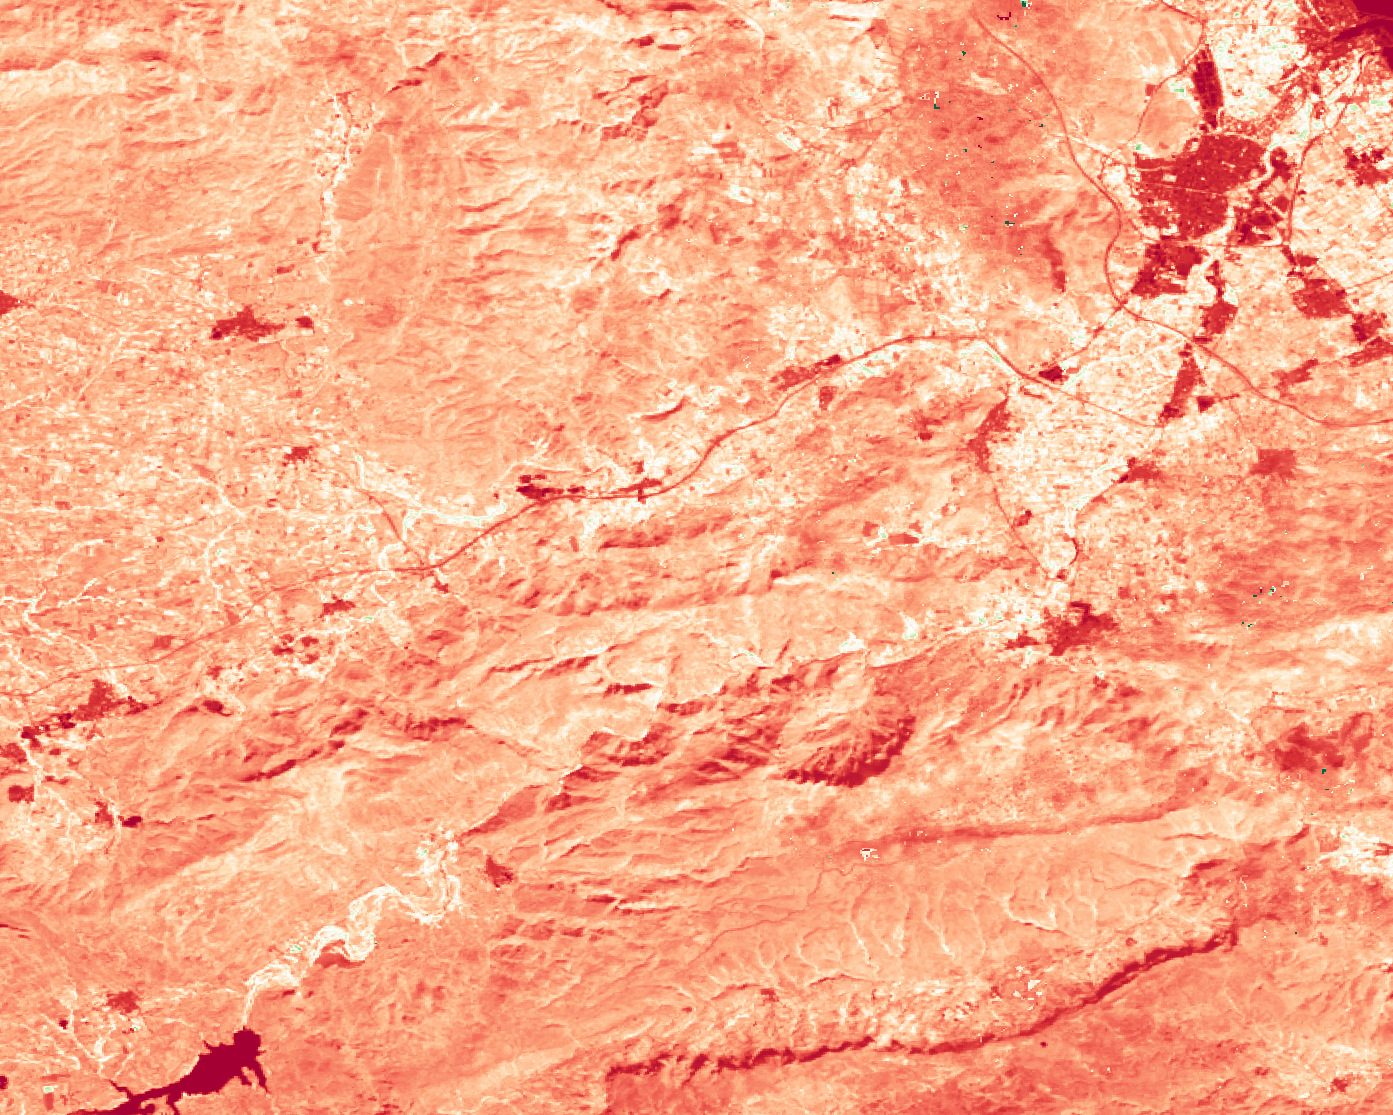

In [7]:
# Creamos el mapa
# 
mapa_raster = folium.Map(location=(39,-0.25), tiles = 'OpenStreetMap', zoom_start = 12)

# Función cargar Geotiff
def geotiff (imagen, nombre):
    # Formateamos la imagen
    ds = rasterio.open(imagen)
    c = ds.bounds
    datos = ds.read()
    datos = numpy.moveaxis(datos,(0,1,2),(2,0,1))

    # Creamos la imagen y la añadimos al mapa
    folium.raster_layers.ImageOverlay(
        image=datos,
        name=nombre,
        bounds=[[c.bottom, c.left],[c.top, c.right]],
        colormap=cm.RdYlGn,       # https://matplotlib.org/stable/gallery/color/colormap_reference.html
        ).add_to(mapa_raster)

# Función Cargar un PNG    
def png (imagen,nombre):
    folium.raster_layers.ImageOverlay(
        image=imagen,
        name=nombre,
        bounds=[[38.9, -0.4], [39.1, -0.2]],
       ).add_to(mapa_raster)
    
    
# Llamada a las funciones
geotiff("Chenyi_Ruiyu_EVI_pre.tif","EVI_pre")
#png("RASTER/SAVI_POST.png", "SAVI_POST")

# Exportamos el mapa
folium.LayerControl().add_to(mapa_raster)
mapa_raster.save('mapa_raster_pre.html')
mapa_raster

<h2><font color="blue" > DATOS VECTORIALES </font></h2><p>

In [ ]:
# Creamos el mapa 
mapa_vec = folium.Map(location=(43,-8), tiles = 'OpenStreetMap', zoom_start = 8)

# Lectura y transformación del Shape
gpd.read_file('').to_file('website_portafolio/GALICIA_ECUALIPTUS.geojson', driver='GeoJSON')
json = gpd.read_file('VECTORIAL/GALICIA_ECUALIPTUS.geojson')

# añadimos elementos al mapa

# Macador con la Aptitud del polígono
popup = folium.GeoJsonPopup(
    fields=["DN"],
    aliases=["Aptitud"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

#Rampa de colores en función de los valores de Aptitud
colormap = branca.colormap.StepColormap(
    vmin=1,
    vmax=3,
    colors=["red", "yellow", "green"],
    caption="Aptitud de la zona",
)

#Capa a representar con la simbología índicada en la rampa
g = folium.GeoJson(
    json,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["DN"]),
        "fillOpacity":0.7,
        "color": "black",
        "weight": 0.2},
    name='Galicia_Ecualiptus',
    popup=popup,
).add_to(mapa_vec)
    
# Control de capas
folium.LayerControl().add_to(mapa_vec)

mapa_vec


<h2><font color="blue" > PLUGINS </font></h2><p>

    
<b> Diferentes plugins de Folium: </b> <a href="https://python-visualization.github.io/folium/plugins.html"> https://python-visualization.github.io/folium/plugins.html </a>    
<p>


In [ ]:
# Herramientas de dibujo
plugins.Draw(export=True).add_to(mapa_vec)

# Minimap
plugins.MiniMap(width=200, height=100, toggle_display=True ).add_to(mapa_vec)

# Localización usuario
plugins.LocateControl().add_to(mapa_vec)

# Coordenadas de ubicación
formato = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
plugins.MousePosition(
    position="topright",
    separator=" | ",
    empty_string="NaN",
    lng_first=True,
    num_digits=20,
    prefix="Coordenadas:",
    lat_formatter=formato,
    lng_formatter=formato,
).add_to(mapa_vec)

# Zoom pantalla completa
plugins.Fullscreen().add_to(mapa_vec)

# Leyenda
legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 80px;
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#008000;font-size:150%;margin-left:20px;">◼</a>&emsp;Aptitud Alta</p>
    <p><a style="color:#FFFF00;font-size:150%;margin-left:20px;">◼</a>&emsp;Aptitud media</p>
    <p><a style="color:#FF0000;font-size:150%;margin-left:20px;">◼</a>&emsp;Aptitud baja</p>
</div>

{% endmacro %}
"""

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)
mapa_vec.add_child(legend)

mapa_vec.save("mapa_vectorial.html")
mapa_vec

### Busqueda de elementos

In [ ]:
# Generar la base de datos
accidentes_Madrid = folium.Map(location=(40.43,-3.65), tiles = 'OpenStreetMap', zoom_start = 12)
accidentes_df = pd.read_csv('BASE_DATOS/2020_Accidentalidad.csv')
acci_df=accidentes_df.loc[(accidentes_df['tipo_persona']=='Conductor') & (accidentes_df['tipo_vehiculo']=='Turismo')] 

# Repressentar la información
accidentes = plugins.MarkerCluster( name="Accidentes",).add_to(accidentes_Madrid)

for lat, lng, label, in zip(acci_df.latitud, acci_df.longitud, acci_df['num_expediente']): 
    folium.Marker(
        location = [lat, lng],
        icon = folium.Icon(color="orange", icon="fa-car", prefix = 'fa'),
        popup = label,
        name = label, # Nombre del objeto para su posterior indetinficación
        ).add_to(accidentes)

# Buscar Registros
buscar_acci = plugins.Search(
        layer = accidentes,
        geom_type = 'Point',
        collapsed = False,
        search_label = 'name', # Nombre del objeto
        placeholder = 'Num_Expediente',
        ).add_to(accidentes_Madrid)

# Plugins
plugins.MiniMap().add_to(accidentes_Madrid)

# Exportar a HTML
accidentes_Madrid.save("HTML/accidentes.html")
accidentes_Madrid

In [ ]:
# Agrega un cuadro de búsqueda al mapa para buscar características geográficas como ciudades, países, etc. Puede buscar con nombres o direcciones.

# Usar normativa de OpenStreetMap https://operations.osmfoundation.org/policies/nominatim/
mapa_2 = folium.Map(location=(43,-8), tiles = 'OpenStreetMap', zoom_start = 8)

plugins.Geocoder().add_to(mapa_2)

mapa_2